## Conver .tntp to .csv

In [1]:
import pandas as pd

In [5]:
import time

start_time = time.time()

data = pd.read_csv("data/network/SiouxFalls_node_xy.tntp", delim_whitespace=True)

end_time = time.time()
old_duration = end_time - start_time
print("Time taken:", old_duration)
data

Time taken: 0.002782583236694336


/tmp/ipykernel_11370/805605397.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("data/network/SiouxFalls_node_xy.tntp", delim_whitespace=True)


,Node,X,Y
0,1,50000,510000
1,2,320000,510000
2,3,50000,440000
3,4,130000,440000
4,5,220000,440000
5,6,320000,440000
6,7,420000,380000
7,8,320000,380000
8,9,220000,380000
9,10,220000,320000


In [3]:
data = pd.read_csv("data/network/SiouxFalls_node_xy.tntp")


In [4]:
data

,Node\tX\tY
0,1\t50000\t510000
1,2\t320000\t510000
2,3\t50000\t440000
3,4\t130000\t440000
4,5\t220000\t440000
5,6\t320000\t440000
6,7\t420000\t380000
7,8\t320000\t380000
8,9\t220000\t380000
9,10\t220000\t320000


In [3]:
import time

start = time.time()
data = pd.read_csv("data/network/SiouxFalls_node_xy.tntp")

data_new = pd.DataFrame(columns=["node", "x", "y"])
for i, row in data.iterrows():
    each_row_data = row[0]
    splitted_data = each_row_data.split("\t")
    data_new.loc[len(data_new)] = {"node": splitted_data[0], "x": splitted_data[1], "y": splitted_data[2]}

end = time.time()
duration = end - start
print("Time taken:", duration)

Time taken: 0.03274989128112793


/tmp/ipykernel_11370/1566447334.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  each_row_data = row[0]
/tmp/ipykernel_11370/1566447334.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  each_row_data = row[0]
/tmp/ipykernel_11370/1566447334.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  each_row_data = row[0]
/tmp/ipykernel_11370/1566447334.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. I

In [2]:
import time

start = time.time()

data = pd.read_csv("data/network/SiouxFalls_node_xy.tntp")
data["node"] = data["Node\tX\tY"].apply(lambda x: x.split("\t")[0])
data["x"] = data["Node\tX\tY"].apply(lambda x: x.split("\t")[1])
data["y"] = data["Node\tX\tY"].apply(lambda x: x.split("\t")[2])
data.drop(columns=["Node\tX\tY"], inplace=True)

end = time.time()
new_duration = end - start
print("Time taken:", new_duration)

Time taken: 0.008275985717773438


In [16]:
(new_duration / duration) * 100

11.034966885892986

In [17]:
old_duration / new_duration * 100

54.05673167170717

In [ ]:
def f(x):
    return x.split("\t")[0]

lambda x: x.split("\t")[0]

## Read wide data and analysis

<Axes: >

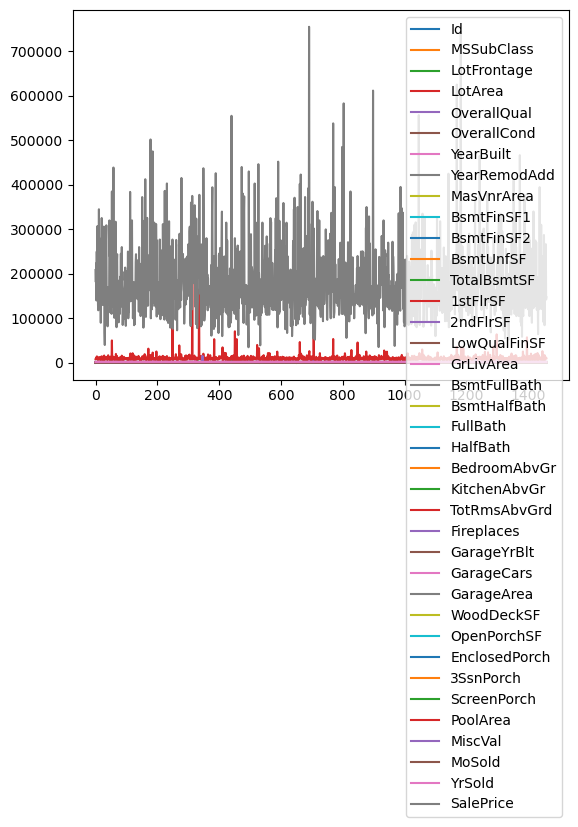

In [18]:
data = pd.read_csv("data/house-price/data-sample.csv")
data.plot()

In [6]:
import time
data = pd.read_csv("data/house-price/data-sample.csv")

start = time.time()
mask1 = data["MSZoning"] == "RL"
mask2 = data["MSZoning"] == "RH"

filtered_data1 = data[mask1]
filtered_data2 = data[mask2]
print(len(filtered_data1), len(filtered_data2))
end = time.time()
duration1 = end - start
print("Time taken:", duration1)

1151 16
Time taken: 0.004363536834716797


In [ ]:
import time

start = time.time()
count1 = 0
count2 = 0
for i, row in data.iterrows():
    if row["MSZoning"] == "RL":
        count1 += 1
    elif row["MSZoning"] == "RH":
        count2 += 1
print(count1, count2)
end = time.time()
duration2 = end - start
print("Time taken:", duration2)

1151 16
Time taken: 0.11187624931335449


## Read long data

In [9]:
import pandas as pd
from tqdm.auto import tqdm

import time
data = pd.read_csv("data/network/simulation_log.csv")

start = time.time()
counts = []
for v_i in tqdm(range(500)):
    count = 0
    for i, row in data.iterrows():
        if row["vehicle_id"] == i:
            count += 1
    counts.append(count)
end = time.time()

duration = end - start
print("Time taken:", duration)
print(counts)

  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [11]:
import time
data = pd.read_csv("data/network/simulation_log.csv")

start = time.time()
counts = []
for v_i in tqdm(range(500)):
    filtered_data = data[data["vehicle_id"] == v_i]
    counts.append(len(filtered_data))
end = time.time()

duration2 = end - start
print("Time taken:", duration2)
print(counts)

  0%|          | 0/500 [00:00<?, ?it/s]

Time taken: 0.22162461280822754
[62, 60, 61, 60, 62, 60, 61, 60, 63, 62, 62, 62, 63, 61, 61, 63, 61, 62, 65, 65, 63, 61, 65, 62, 67, 63, 62, 64, 60, 65, 60, 61, 62, 64, 65, 62, 62, 65, 63, 66, 64, 65, 64, 68, 73, 65, 66, 64, 67, 69, 66, 62, 64, 60, 61, 66, 64, 69, 62, 66, 67, 74, 64, 69, 88, 70, 71, 65, 66, 62, 62, 64, 70, 78, 63, 70, 73, 60, 65, 71, 65, 71, 69, 61, 66, 62, 73, 72, 80, 63, 62, 65, 65, 60, 61, 63, 74, 69, 81, 81, 71, 76, 63, 66, 67, 65, 73, 61, 66, 77, 69, 78, 62, 73, 68, 62, 66, 68, 61, 72, 67, 70, 75, 71, 76, 64, 75, 67, 67, 75, 63, 69, 74, 67, 74, 61, 64, 73, 73, 66, 60, 72, 72, 71, 70, 60, 71, 71, 67, 63, 69, 67, 70, 70, 70, 69, 69, 69, 62, 69, 68, 68, 62, 68, 68, 67, 67, 67, 63, 67, 66, 61, 66, 62, 66, 65, 63, 63, 65, 65, 64, 64, 63, 64, 64, 60, 63, 63, 63, 63, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 59, 59, 59, 59, 59, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 56, 56, 56, 56, 56, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 52, 52,

In [13]:
data

,time,vehicle_id,origin,destination,lane,block,arrival_time,stuck_time,cum_stuck_time,active,light
0,0,0,4,3,0,0,0,0,0,False,none
1,1,1,1,3,1,0,1,0,0,False,none
2,2,2,1,3,1,0,2,0,0,False,none
3,3,3,5,3,0,0,3,0,0,False,none
4,4,4,2,3,0,0,4,0,0,False,none
...,...,...,...,...,...,...,...,...,...,...,...
22352,495,495,1,3,0,0,495,0,0,True,none
22353,496,496,4,3,1,0,496,0,0,True,none
22354,497,497,4,3,1,0,497,0,0,True,none
22355,498,498,1,3,1,0,498,0,0,True,none


## Class Task
### We have house prices. In the information file, you can see that
> Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

- I want you to get the data only about the house prices with more population in dataset than 75 according to Neighborhood.

In [19]:
import pandas as pd
data = pd.read_csv("data/house-price/data-sample.csv")
data["Neighborhood"].groupby(data["Neighborhood"]).count().sort_values(ascending=False)
output_1 = data[data["Neighborhood"].map(data["Neighborhood"].value_counts()) > 75]
output_1["Neighborhood"].groupby(output_1["Neighborhood"]).count().sort_values(ascending=False)
output_1.to_csv("result/session3_output_1.csv", index=False)
output_1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### Now using the new data, I want you to keep two of the features -> [YearBuilt, OverallQual and LotArea] and scale them between 0 and 1. Then five me a data with those columns.

In [20]:
output_2 = pd.DataFrame(columns=["Id", "SalePrice", "OverallQual", "YearBuilt", "LotArea"])
output_2["Id"] = output_1["Id"]
output_2["SalePrice"] = output_1["SalePrice"]
max_overall_qual = output_1["OverallQual"].max()
output_2["OverallQual"] = output_1["OverallQual"].apply(lambda x: x / max_overall_qual)
max_year_built = output_1["YearBuilt"].max()
output_2["YearBuilt"] = output_1["YearBuilt"].apply(lambda x: x / max_year_built)
max_lotarea = output_1["LotArea"].max()
output_2["LotArea"] = output_1["LotArea"].apply(lambda x: x / max_lotarea)
output_2

,Id,SalePrice,OverallQual,YearBuilt,LotArea
0,1,208500,0.7,0.997013,0.132265
2,3,223500,0.7,0.996018,0.176092
6,7,307000,0.8,0.997511,0.157841
8,9,129900,0.7,0.961175,0.095794
11,12,345000,0.9,0.998009,0.186642
...,...,...,...,...,...
1452,1453,145000,0.5,0.998009,0.057523
1454,1455,185000,0.7,0.997511,0.117395
1455,1456,175000,0.6,0.995022,0.123922
1458,1459,142125,0.5,0.970632,0.152097


#### According to information:

> Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Try to make one-hot encoding to make this feature valueable for learning.
One-Hot Encoding means: One-Hot Encoding is a method of representing characters or words by a vector where only one element is set to one and all others are zero, based on their position in the vocabulary.
This means, you should buiild 6 columns, each shows if the house has that special type of heating or not(0 or 1).

In [21]:
output_3 = output_1.copy()[["Id", "SalePrice", "Heating"]]
output_3 = pd.get_dummies(output_3, columns=["Heating"], prefix=["Heating"])
output_3

,Id,SalePrice,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,208500,True,False,False,False,False
2,3,223500,True,False,False,False,False
6,7,307000,True,False,False,False,False
8,9,129900,True,False,False,False,False
11,12,345000,True,False,False,False,False
...,...,...,...,...,...,...,...
1452,1453,145000,True,False,False,False,False
1454,1455,185000,True,False,False,False,False
1455,1456,175000,True,False,False,False,False
1458,1459,142125,True,False,False,False,False


In [22]:
output_1["Heating"].value_counts()

Heating
GasA    808
GasW     12
Grav      4
Wall      4
OthW      2
Name: count, dtype: int64

#### Now let's conbinde them and save the cleaned data.

In [23]:
output_4 = output_2.merge(output_3, on=["Id", "SalePrice"])

In [24]:
output_4.to_csv("result/session3_final_output.csv", index=False)